### Boa noite,

começaremos em breve.

 https://forms.gle/EhjkK8RFvVe6vLUU9

**Manchas de óleo (2019) - IBAMA**

In [10]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from windrose import WindroseAxes
import matplotlib.cm as cm

%matplotlib inline

url = "http://www.ibama.gov.br/phocadownload/emergenciasambientais/2019/manchasdeoleo/2019-12-02_LOCALIDADES_AFETADAS.xlsx"
df = pd.read_excel(
    url,
    parse_dates=["Data_Avist", "Data_Revis"],
)

# Calculando o tempo de permanência da mancha em cada localidade
df["dias"] = (df["Data_Revis"] - df["Data_Avist"]).dt.days

# tratando as colunas de tempo
df['Data_Avist'] = df['Data_Avist'].dt.strftime('%Y-%m-%d').str.replace('NaT', 'na')
df["Data_Revis"] = df["Data_Revis"].dt.strftime("%Y-%m-%d").str.replace("NaT", "na")
df["dias"] = df["dias"].astype(float)

df.dropna(inplace=True)

In [12]:
# um pouco de limpeza de dados (data cleaning)

# removendo linhas onde o status == nao observado
filtr = (df['Status'] == 'Oleo Nao Observado')
df = df[~filtr].copy()

# removendo registros onde o dias == 0
filtr = (df['dias'] == 0)
df = df[~filtr].copy()

df.head()

,geocodigo,localidade,loc_id,municipio,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude,dias
1,3201605,Praia de Guriri,3201605_46,Conceição da Barra,Espírito Santo,ES,2019-11-18,2019-11-19,Oleada - Vestigios / Esparsos,"18° 42' 14.87"" S","39° 44' 45.92"" W",1.0
2,3201605,Praia de Guriri,3201605_45,Conceição da Barra,Espírito Santo,ES,2019-11-21,2019-11-27,Oleada - Vestigios / Esparsos,"18° 41' 54.57"" S","39° 44' 40.31"" W",6.0
3,2207702,Praia do Pontal,2207702_4,Parnaíba,Piauí,PI,2019-11-08,2019-11-17,Oleada - Vestigios / Esparsos,"2° 45' 46.58"" S","41° 46' 54.03"" W",9.0
16,2304459,Pontal de Maceió,2304459_1,Fortim,Ceará,CE,2019-09-28,2019-12-01,Oleada - Vestigios / Esparsos,"4° 25' 21.79"" S","37° 45' 55.83"" W",64.0
17,2805307,Praia Pirambu,2805307_22,Pirambu,Sergipe,SE,2019-11-09,2019-11-26,Oleada - Vestigios / Esparsos,"10° 41' 14.27"" S","36° 47' 2.093"" W",17.0


<AxesSubplot:ylabel='sigla_uf'>

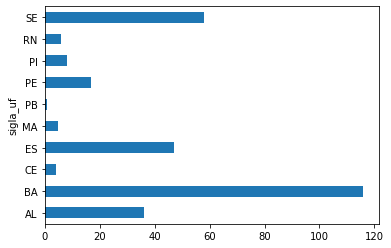

In [4]:
# Estado mais afetado
df.groupby('sigla_uf').count()['estado'].plot(kind='barh')


In [13]:
# Município mais afetado
df.groupby('municipio').count()\
        .sort_values(by='Data_Revis', 
                     ascending=False)\
        .head(10)

,geocodigo,localidade,loc_id,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude,dias
municipio,,,,,,,,,,,
São Mateus,21,21,21,21,21,21,21,21,21,21,21
Aracaju,19,19,19,19,19,19,19,19,19,19,19
Ilhéus,18,18,18,18,18,18,18,18,18,18,18
Conceição da Barra,16,16,16,16,16,16,16,16,16,16,16
Estância,14,14,14,14,14,14,14,14,14,14,14
Prado,12,12,12,12,12,12,12,12,12,12,12
Maraú,12,12,12,12,12,12,12,12,12,12,12
Barra dos Coqueiros,11,11,11,11,11,11,11,11,11,11,11
Entre Rios,9,9,9,9,9,9,9,9,9,9,9


In [17]:
# primeiros e ultimos afetados
# filtr = (df['Data_Avist'] == df.min()['Data_Avist'])
# df[filtr].head(5)

df[df['Data_Revis'] == df.max()['Data_Revis']].sort_values(by='dias', ascending=False).head(5)


,geocodigo,localidade,loc_id,municipio,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude,dias
215,2414209,Praia do Amor,2414209_5,Tibau do Sul,Rio Grande do Norte,RN,2019-09-10,2019-12-02,Oleada - Vestigios / Esparsos,"6° 13' 44.49"" S","35° 2' 34.26"" W",83.0
209,2800308,Atalaia,2800308_9,Aracaju,Sergipe,SE,2019-10-02,2019-12-02,Oleada - Vestigios / Esparsos,"10° 58' 55.88"" S","37° 2' 14.16"" W",61.0
578,2910602,Foz do Rio Inhampube,2910602_11,Esplanada,Bahia,BA,2019-10-07,2019-12-02,Oleada - Vestigios / Esparsos,"12° 5' 59.78"" S","37° 41' 11.97"" W",56.0
202,2800308,Praia dos Artistas,2800308_6,Aracaju,Sergipe,SE,2019-10-29,2019-12-02,Oleada - Vestigios / Esparsos,"10° 58' 26.94"" S","37° 1' 52.02"" W",34.0
125,2914901,Praia da Ribeira,2914901_7,Itacaré,Bahia,BA,2019-10-30,2019-12-02,Oleada - Vestigios / Esparsos,"14° 17' 27.58"" S","38° 58' 59.51"" W",33.0


In [18]:
# afetados por mais tempo
df.groupby(by='localidade').sum().sort_values('dias', ascending=False).head(5)

,geocodigo,dias
localidade,,
Praia da Costa,14320119,148.0
Atalaia,5006014,113.0
Praia de Flexeiras,10810808,108.0
Praia de Jatobá,8401815,97.0
Atalaia Nova,2800605,90.0


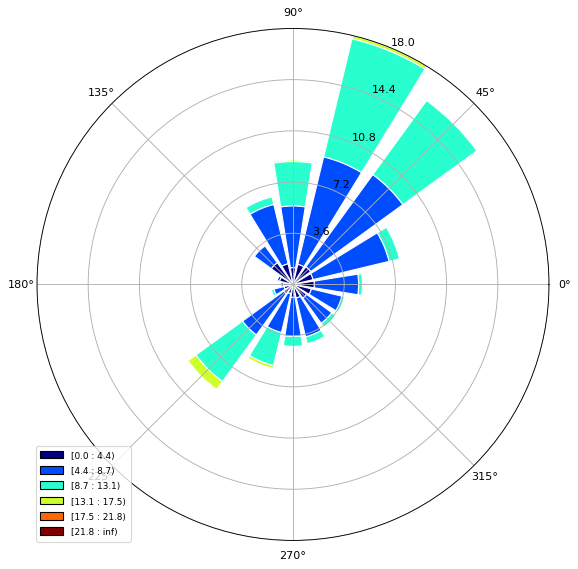

In [8]:
# funcao: será utilizada no date_parser
def dateparse(x):
    return pd.datetime.strptime(x, '%Y %m %d %H %M')
df = pd.read_csv('../dados/pnboia_vitoria.csv',
                 parse_dates={'datetime': ['Year', 'Month', 'Day', 'Hour', 'Minute']},date_parser=dateparse, decimal=',')
# agora podemos converter nossa coluna datetime em index
df.set_index('datetime', inplace=True)
# replace numeros invalidos
df = df.replace(-9999.0, np.nan)
ws,wd = df['Wspd'], df['Wdir']
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

# Aula 6 - Mapas

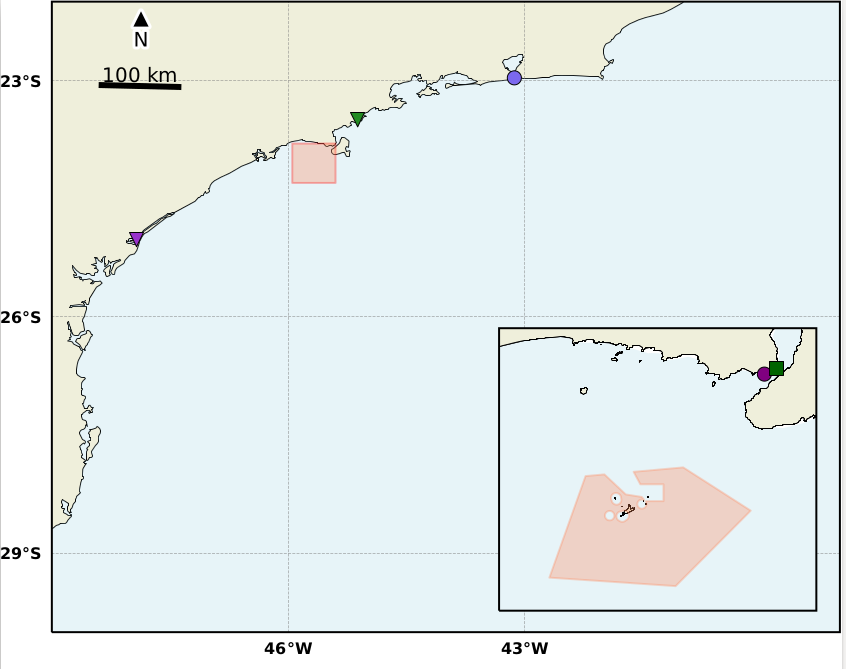

**materiais de apoio**

- Documentação cartopy:
- NaturalEarth: conjunto de informações geográficas de acesso público [[link]](https://www.naturalearthdata.com/downloads/) ou [[link]](https://github.com/nilodna/natural-earth-vector/tree/master/packages/Natural_Earth_quick_start)
- OpenStreetMap: iniciativa colaborativa para acesso livre à informações geográficas [[link]](https://download.geofabrik.de/south-america/brazil.html)
- 

### O que é cartopy?

- processamento de dados geoespaciais
- mapas com alta qualidade
- jornais mundo afora
- controle dos elementos cartográficos

**Criando geofiguras**

- criar ```GeoAxes```
- integra matplotlib e cartopy
- utilizando uma projeção
- Duas formas:


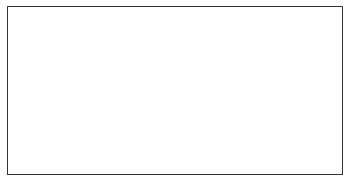

In [19]:
import matplotlib.pyplot as plt
# padrão de importação: crs é o core do pacote
import cartopy.crs as ccrs

%matplotlib inline

# modo 1:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.PlateCarree())

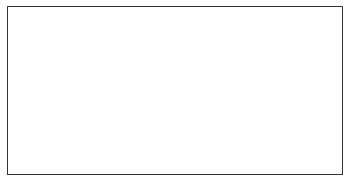

In [20]:
fig,ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

**Principais métodos**


- **ax.coastlines():** inserir linha de costa
- **ax.set_global():** ajusta limites geográficos para o globo
- **ax.set_extent():** ajusta os limites geográficos para uma região
- **ax.stock_img():** adiciona uma imagem padrão ao mapa
- **ax.imshow():** adiciona imagem personalizada ao mapa
- **ax.add_geometries():** adiciona geometrias do shapely (pacote de leitura de shapefiles)
- **ax.gridlines():** adiciona linhas de grade associadas às coordenadas

In [21]:
# apenas pq podemos, vamos criar uma função para retornar um mapa

def create_map(projection):
    fig,ax = plt.subplots(subplot_kw={'projection': projection})
    
    return fig,ax

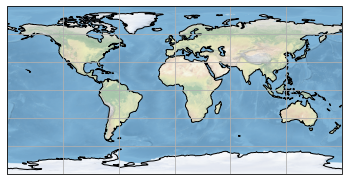

In [23]:
proj = ccrs.PlateCarree()

fig,ax = create_map(proj)

# adicionando linha de costa
ax.coastlines()

# adicionando gridline
ax.gridlines()

# adicionando imagem padrão
ax.stock_img()

**Projeção de mapas: problemas**

- Terra não é plana
- projetar esfera em plano: distorção

![image.png](https://raw.githubusercontent.com/SciTools/cartopy-tutorial/master/static/orange_peel.jpg)

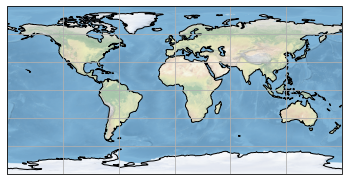

In [29]:
# Robinson, Mercator, Orthographic, InterruptedGoodeHomolosine

fig,ax = create_map(ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines()

**Criando um mapa regional**

- área de estudo
- mapa da PCSE
- Unidade de Conservação do Arquipélago de Alcatrazes (ICMBio)


In [37]:
# importando diversos pacotes novos
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
# pacotes relacionados às funcionalidades do cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom

**Primeiros passos**

- determinar projeção
- limites geográficos
- google maps para auxiliar
    - canto inferior esquerdo
    - canto superior direito

In [31]:
# projecao
proj = ccrs.PlateCarree()

# posicao do canto inferior esquerdo
lower_lon = -50
lower_lat = -30

# posicao do canto superior direito
upper_lon = -41
upper_lat = -22

**Linha de costa**

- padrão: NaturalEarth (1cm:10m)
- download feito automaticamente
- demora, mas depois fica rápido
- para mais conjuntos, visite: [Natural Earth](https://www.naturalearthdata.com/)

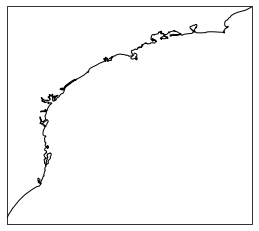

In [34]:
# montando uma lista para facilitar enviar para o GeoAxes os limites geográficos. 
extent = [lower_lon, upper_lon, lower_lat, upper_lat]
# criando mapa com a função 
fig,ax = create_map(ccrs.PlateCarree())
# alterando para os limites criados acima
ax.set_extent(extent)
# inserindo linha de costa com resolução de 1:110, teste com 10m e 50m
ax.coastlines('10m')

Dentre os conjuntos do **NaturalEarth**, podemos ainda utilizar:

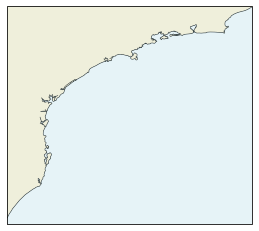

In [36]:
import cartopy.feature as cfeature

fig,ax = create_map(ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines('10m')

coastline_10m = cfeature.NaturalEarthFeature(
    category='physical',name='coastline',scale='10m',
    facecolor=cfeature.COLORS['land'])

bathy_0m      = cfeature.NaturalEarthFeature(category='physical',name='bathymetry_L_0',scale='10m')

# inserting information over the map
ax.add_feature(coastline_10m, edgecolor='black', linewidth=.05)
ax.add_feature(bathy_0m, facecolor='lightblue', alpha=.3)

criando uma função para auxiliar:

In [38]:
def make_map(fig=None, ax=None, extent=[-50,-41,-30,-22], projection=ccrs.PlateCarree()):
    """ 
    documente-a como exercício para entender a 
    ação de cada linha
    """
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    coastline_10m = cfeature.NaturalEarthFeature(
        category='physical',name='coastline',scale='10m',
        facecolor=cfeature.COLORS['land'])

    bathy_0m      = cfeature.NaturalEarthFeature(
        category='physical',name='bathymetry_L_0',scale='10m')

    # inserting information over the map
    ax.add_feature(coastline_10m, 
                   edgecolor='black',
                   linewidth=.1)
    ax.add_feature(bathy_0m,
                   facecolor='lightblue',
                   alpha=.3)
    
    return ax

**Meridianos e Paralelos como grids**

- ```.gridlines()```
- limites geográficos como referência
- customizar: grossura, cor, transparencia, etc ...

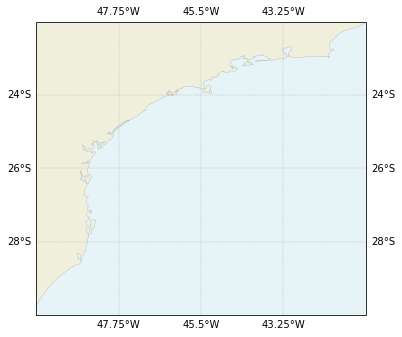

In [39]:
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())

# criando as gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.4, color='gray', 
                  alpha=0.5, linestyle='--', 
                  xlocs=np.linspace(extent[0], extent[1], 5),
                  ylocs=np.linspace(extent[3], extent[2], 5))

Rótulos aparecem ao redor de todo o mapa, mas podemos customizar isso também!

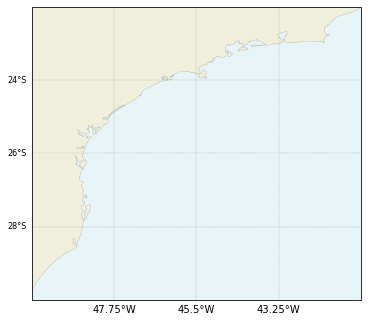

In [40]:
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())

# criando as gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.4, color='gray', 
                  alpha=0.5, linestyle='--', 
                  xlocs=np.linspace(extent[0], extent[1], 5),
                  ylocs=np.linspace(extent[3], extent[2], 5))

gl.top_labels = False
gl.right_labels = False

# dicionario com configurações dos rótulos
dict_style_labels = {'color': 'black', 'fontsize': 8}

gl.ylabel_style = dict_style_labels
gl.xlabel_style = dict_style_labels

Vamos criar uma segunda função, para configurar o mapa em termo de meridianos e paralelos:

In [41]:
def configuring_map(ax, extent):
    # criando as gridlines 
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=.4, color='gray', 
                      alpha=0.5, linestyle='--', 
                      xlocs=np.linspace(extent[0], extent[1], 5),
                      ylocs=np.linspace(extent[3], extent[2], 5))

    gl.top_labels = False
    gl.right_labels = False

    # dicionario com configurações dos rótulos
    dict_style_labels = {
        'color': 'black',
        'fontsize': 8
    }

    gl.ylabel_style = dict_style_labels

**Notem que:**

- duas funções capazes de criar um mapa para qualquer lugar no globo
- podemos começar a pensar em criar nossas próprias coleções de funçõs, para não nos repetirmos!

![image.png](../figures/247.gif)

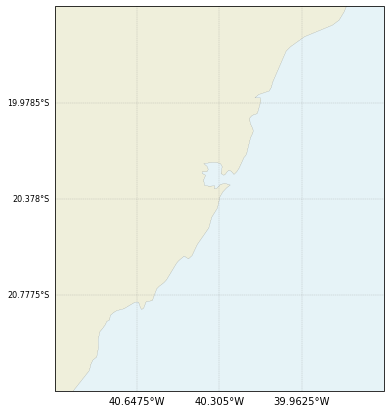

In [42]:
# mapa Espirito Santo (centrado em Vitória)
lower = [-40.99, -21.177]
upper = [-39.62, -19.579]
extent2 = [lower[0], upper[0], lower[1], upper[1]]

fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax = make_map(fig=fig, ax=ax, extent=extent2, projection=ccrs.PlateCarree())
configuring_map(ax, extent=extent2)

**Unidade de Conservação**

- estabelecer limites geográficos para criar minimapa
- inserir polígono indicando aonde iremos dar zoom no mapa

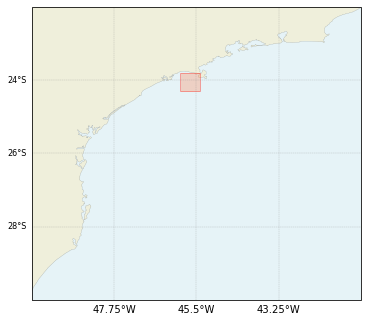

In [53]:
# coordenadas geográficas do limite do minimapa
lower = [-24.3, -45.949]
upper = [-23.8, -45.4]
extent_UC = [lower[1], upper[1], lower[0], upper[0]]
# usando um método novo do matplotlib, criamos um polígono

extent_box = sgeom.box(extent_UC[0], extent_UC[2], extent_UC[1], extent_UC[3])

# plotando mapa
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
configuring_map(ax, extent)
_ = ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                      facecolor='coral', # cor do polígono
                      edgecolor='red',   # cor das arestas
                      alpha=.3)          # transparência

**Inserindo minimapa**

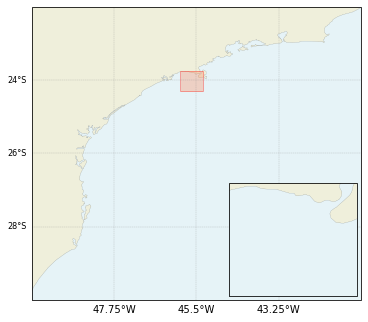

In [54]:
# coordenadas geográficas do limite do minimapa
lower,upper = [-24.3, -45.949], [-23.74, -45.32]
extent_UC = [lower[1], upper[1], lower[0], upper[0]]
# usando um método novo do matplotlib, criamos um polígono
extent_box = sgeom.box(extent_UC[0], extent_UC[2], extent_UC[1], extent_UC[3])
# plotando mapa
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
configuring_map(ax, extent)
_ = ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                      facecolor='coral', # cor do polígono
                      edgecolor='red',   # cor das arestas
                      alpha=.3)          # transparência
# setting axes position and size
left,bottom   = 0.465, 0.25
width, height  = 0.55, 0.20
rect = [left,bottom,width,height]

# creating axes 2 for minimap
ax2 = plt.axes(rect, projection=ccrs.PlateCarree())
ax2 = make_map(fig=fig, ax=ax2, extent=extent_UC)

plt.savefig('tmp_map.png', dpi=150)


**Lendo shapefiles com cartopy.shapereader**

- requisitos: shapely

In [55]:
def criando_mapa(extent):
    # coordenadas geográficas do limite do minimapa
    lower = [-24.3, -45.949]
    upper = [-23.74, -45.32]
    extent_UC = [lower[1], upper[1], lower[0], upper[0]]
    # usando um método novo do matplotlib, criamos um polígono
    extent_box = sgeom.box(extent_UC[0], extent_UC[2], extent_UC[1], extent_UC[3])
    
    # plotando mapa
    fig = plt.figure(figsize=(15/2.54,20/2.54))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
    configuring_map(ax, extent)
    _ = ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                          facecolor='coral', # cor do polígono
                          edgecolor='red',   # cor das arestas
                          alpha=.3)          # transparência

    # setting axes position and size
    left,bottom   = 0.465, 0.25
    width, height  = 0.55, 0.20
    rect = [left,bottom,width,height]

    # creating axes 2 for minimap
    ax2 = plt.axes(rect, projection=ccrs.PlateCarree())
    ax2 = make_map(fig=fig, ax=ax2, extent=extent_UC)
    
    return fig,ax,ax2

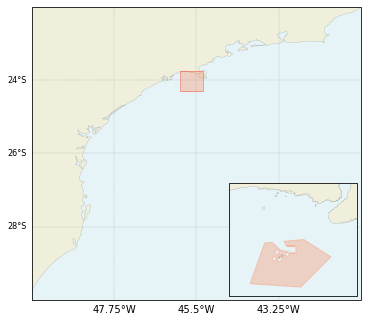

In [58]:
# criei uma função temporaria para facilitar a visualização
fig,ax,ax2 = criando_mapa(extent)

# adicionando linha de costa do OpenStreetMap
line = shpreader.Reader('../dados/OSM/OSM_BRA_coastline/lines.shp')
ax2.add_geometries(line.geometries(), ccrs.PlateCarree(), facecolor='none',edgecolor='black',linewidth=.05)

# adicionando continente do OpenStreetMap
land = shpreader.Reader('../dados/OSM/OSM_BRA_land/land.shp')
ax2.add_geometries(land.geometries(), ccrs.PlateCarree(),facecolor=cfeature.COLORS['land'],edgecolor='black',linewidth=0.05)

# adicionando área da unidade de conservação (terra e água)
ucs = shpreader.Reader('../dados/alcatrazes/alcatrazes.shp')
ax2.add_geometries(ucs.geometries(), ccrs.PlateCarree(),facecolor='coral',alpha=.3,edgecolor='coral')

plt.savefig('tmp_map.png', dpi=150)

Como temos tudo elaborado, transformei o bloco de códigos para inserir o minimapa de Alcatrazes em uma função que chamei de:
```create_alcatrazes(ax)``` para facilitar.

In [59]:
def create_alcatrazes(ax):

    # coordenadas geográficas do limite do minimapa
    lower_lat = -24.3
    lower_lon = -45.949
    upper_lat = -23.74
    upper_lon = -45.32

    extent_UC = [lower_lon, upper_lon, lower_lat, upper_lat]

    # usando um método novo do matplotlib, criamos um polígono
    extent_box = sgeom.box(extent_UC[0], extent_UC[2], 
                           extent_UC[1], extent_UC[3])

    # adicionando polígono no mapa
    ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                      facecolor='coral', # cor do polígono
                      edgecolor='red',   # cor das arestas
                      alpha=.3)          # transparência

    # setting axes position and size
    left   = 0.465
    bottom = 0.25
    width  = 0.55
    height = 0.20

    rect = [left,bottom,width,height]

    # creating axes 2 for minimap
    ax2 = plt.axes(rect, projection=ccrs.PlateCarree())
    ax2 = make_map(fig=fig, ax=ax2, extent=extent_UC)

    # adicionando linha de costa do OpenStreetMap
    line = shpreader.Reader('../dados/OSM/OSM_BRA_coastline/lines.shp')
    ax2.add_geometries(line.geometries(), ccrs.PlateCarree(),facecolor='none',edgecolor='black',linewidth=.05)

    # adicionando continente do OpenStreetMap
    land = shpreader.Reader('../dados/OSM/OSM_BRA_land/land.shp')
    ax2.add_geometries(land.geometries(), ccrs.PlateCarree(),facecolor=cfeature.COLORS['land'],edgecolor='black',linewidth=0.05)

    # adicionando área da unidade de conservação (terra e água)
    ucs = shpreader.Reader('../dados/alcatrazes/alcatrazes.shp')
    ax2.add_geometries(ucs.geometries(), ccrs.PlateCarree(),facecolor='coral',alpha=.3,edgecolor='coral')
    
    return ax2

**Inserindo localizações com scatter**

- dicionário com informações para plotar
- estações meteorológicas, fundeios, etc


In [48]:
# criando dicionário com os locais e metadados

insitu = {
    'simcosta-css': {
        'coords': (-23.831, -45.423), # lat,lon
        'marker': 's',
        'color': 'purple',
        'label': 'SiMCosta - SP',
        'minimap': True # plotar no minimapa?
    },
    
    'simcosta-rj': {
        'coords': (-22.967, -43.131),
        'marker': 's',
        'color': 'green',
        'label': 'SiMCosta - RJ',
        'minimap': False
    },
    
    'base-ubatuba': {
        'coords': (-23.499, -45.119),
        'marker': 'o',
        'color': 'k',
        'label': 'Base Ubatuba (IOUSP)',
        'minimap': False
        
    },
    'base-cananeia': {
        'coords': (-25.02, -47.925),
        'marker': 'o',
        'color': 'r',
        'label': u'Base Cananéia (IOUSP)',
        'minimap': False
    }
}

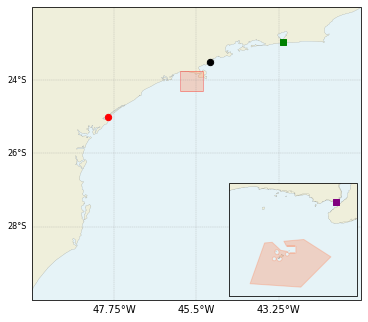

In [60]:
# código completo
# projecao
proj = ccrs.PlateCarree()
lower_lon, lower_lat = -50, -30
upper_lon, upper_lat = -41, -22
extent = [lower_lon, upper_lon, lower_lat, upper_lat]
# criando a base do mapa:
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
configuring_map(ax, extent)
# inserindo o minimapa completo
ax2 = create_alcatrazes(ax)

# inserindo marcadores de pontos de observação
for local,metadados in insitu.items():
    # extraindo metadados
    lat,lon = metadados['coords']
    marker = metadados['marker']
    color = metadados['color']
    label = metadados['label']
    
    # varia o ax_plot de acordo com o mapa que deve exibir a informação
    if metadados['minimap']:
        ax_plot = ax2
    else:
        ax_plot = ax
        
    ax_plot.scatter(lon, lat, s=40, marker=marker, color=color, label=label, zorder=50)

plt.savefig('mapa_alcatrazes.png', dpi=150)

**Exercícios**

Sabendo como elaborar um mapa, utilize o conjunto de informações da última aula para reproduzir alguns mapas.

1) Faça um mapa indicando os Estados mais afetados, utilizando como marker='o' (uma bola) e essa bola deve variar de tamanho segundo a quantidade de regiões atingidas apenas.

2) Selecione uma das regiões acima e reproduza um mapa mais detalhado, indicando as praias que foram atingidas. Tente variar as cores dos marcadores segundo a evolução temporal: primeira afetada com uma cor e varia até a cor da última afetada.

3) Utilize a coluna "dias" do dataframe e refaça o mapa 1), mas agora varie o tamanho dos marcadores segundo o tempo de permanência somado dos Estados. Para isso use o agrupamento do pandas com o método ```.sum()```.

**Dicas**:

- edite as funções que criamos hoje, para se adequar aos casos

Para auxiliar, é necessário converter o formato de latitude e longitude presente no dataframe. Para isso, use a função abaixo, obtida com o [Filipe Fernandes](ttps://gist.github.com/ocefpaf/60bec6fbd252107de11073376bad7925) e insira essa função usando o método ```.apply()``` do pandas para converter.

```python
df['new_lon'] = df['Longitude'].apply(fix_pos)
```

In [ ]:
def fix_pos(pos):
    # source: https://gist.github.com/ocefpaf/60bec6fbd252107de11073376bad7925
    deg, rest = pos.split("°")
    mi, rest = rest.strip().split("'")
    sec, hem = rest.strip().split('"')
    hem = hem.strip()

    deg, mi, sec = map(float, (deg, mi, sec))
    if hem in ["S", "W"]:
        sign = -1
    elif hem in ["N", "E"]:
        sign = +1
    else:
        raise ValueError(f"Unrecognized sign {sign}, expected 'S', 'W', 'E', or 'N'")

    return sign * (deg + mi/60 + sec/60/60)